In [5]:
from __future__ import  division
%matplotlib inline
from data_tools import draw_all_datasets, draw_bar_chart
from data_tools import get_dict_from_file, get_names_from_files
import itertools

In [6]:
PATH = "datasets/"
dataset_filenames = {"coco":PATH+"coco.txt", 
                     "voc":PATH+"pascal_voc.txt", 
                     "voc_contex":PATH+"pascal_voc_context.txt", 
                     "cocostuff":PATH+"cocostuff.txt",
                     "citiscapes":PATH+"citiscraper.txt",
                     "ade20k":PATH+"ade20k.txt",
                    "lsvrc_bb":PATH+"LSVRC_bb_2015.txt"}
total_number_of_pictures = {"coco":82783, 
                            "voc":2913, 
                            "voc_contex": 10103, 
                            "cocostuff":82783,
                            "citiscapes":5000,
                            "ade20k": 22210,
                           "lsvrc_bb":534309}

In [7]:
draw_all_datasets(dataset_filenames)

In [8]:
all_objects = {}
for name in dataset_filenames.keys():
    filename = dataset_filenames[name]
    all_objects[name]=get_dict_from_file(filename)

In [9]:
total_number_labels = {}
total_number_appearance = {}
for name in dataset_filenames.keys():
    total_number_labels[name] = len(all_objects[name].keys())
    total_number_appearance[name] = sum(all_objects[name].values())


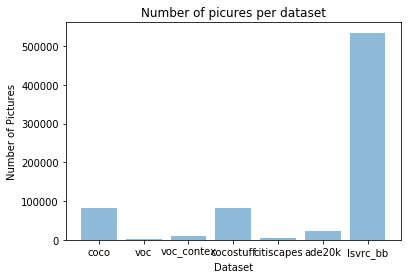

In [10]:
draw_bar_chart(total_number_labels.keys(), total_number_of_pictures.values(), "Number of Pictures", "Dataset", "Number of picures per dataset")

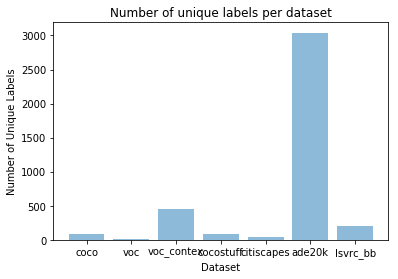

In [11]:
draw_bar_chart(total_number_labels.keys(), total_number_labels.values(), "Number of Unique Labels", "Dataset", "Number of unique labels per dataset")

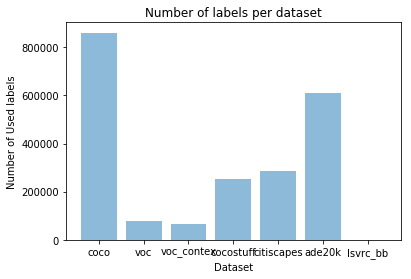

In [12]:
draw_bar_chart(total_number_labels.keys(), total_number_appearance.values(), "Number of Used labels", "Dataset", "Number of labels per dataset")

In [13]:
matrix = {}
for d1 in all_objects.keys():
    for d2 in all_objects.keys():
        matrix[(d1,d2)] = len(set(get_names_from_files(dataset_filenames[d1])).intersection(set(get_names_from_files(dataset_filenames[d2]))))
print("Intresection between datasets")

def get_alligned_str(total_len, string):
    spaces = total_len-len(string)
    before = spaces//2
    if (spaces%2==1):
        after = before+1
    else:
        after = before
    curr = ' '*before+ string+' '*after+"|"
    return curr

head = "|  dataset  |"
for d1 in all_objects.keys():
    head =head+get_alligned_str(11, d1)
print(head)
for d1 in all_objects.keys():
    line = '|'+ get_alligned_str(11, d1)
    for d2 in all_objects.keys():
        value = matrix[(d1,d2)]       
        line = line+get_alligned_str(11, str(round(value,3)))
    print(line)  

Intresection between datasets
|  dataset  |   coco    |    voc    |voc_contex | cocostuff |citiscapes |  ade20k   | lsvrc_bb  |
|   coco    |    80     |    14     |    41     |     0     |     8     |    59     |    28     |
|    voc    |    14     |    20     |    19     |     0     |     5     |    16     |    11     |
|voc_contex |    41     |    19     |    460    |    33     |    15     |    326    |    56     |
| cocostuff |     0     |     0     |    33     |    92     |     3     |    52     |     1     |
|citiscapes |     8     |     5     |    15     |     3     |    40     |    23     |     7     |
|  ade20k   |    59     |    16     |    326    |    52     |    23     |   3040    |    96     |
| lsvrc_bb  |    28     |    11     |    56     |     1     |     7     |    96     |    201    |


The matrix above shows the intersection among datasets. TODO: how many images per one intersection.

I would suggest using voc_context, coco, cocostuff and part of ade20k. 
Coco and cocostuff may be used as exclusive datasets.
Voc and Voc_context as subset one of the other.
Voc_context has a large intersection with coco, ade20k, cocostuff.
Ade20K and Voc_context intresects 326/460(for voc_context) labels. 

In [14]:
unique_set= []
for d1 in all_objects.keys():
    unique_set.extend(all_objects[d1].keys())
unique_set = set(unique_set)

# Conclusion:
### Total number of uniquie labels through all 6 datasets: 3249
### Total number of pictures: 205792
### Total number of occurrence: 2 156 273
